#  DSC478 - Programming Machine Learning Applications
## Assignment 4 - Lavinia Wang

### Problem 1. PCA for Reduced Dimensionality in Clustering

Use an image segmentation data set for clustering. Experiment with using PCA as an approach to reduce dimensionality and noise in the data. Compare the results of clustering the data with and without PCA using the provided image class assignments as the ground truth. The data set is divided into three files. The file "segmentation_data.txt" contains data about images with each line corresponding to one image. Each image is represented by 19 features (these are the columns in the data and correspond to the feature names in the file "segmentation_names.txt". The file "segmentation_classes.txt" contains the class labels (the type of image) and a numeric class label for each of the corresponding images in the data file. After clustering the image data, you will use the class labels to measure completeness and homogeneity of the generated clusters. The data set used in this problem is based on the Image Segmentation data set at the UCI Machine Learning Repository.

Dataset: <a href='http://facweb.cs.depaul.edu/mobasher/classes/CSC478/Data/segmentation_data.zip'>segmentation_data.zip</a> Dataset description <a href='http://archive.ics.uci.edu/ml/datasets/Image+Segmentation'>here</a>

In [17]:
# Import modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import os 

from sklearn import preprocessing
from sklearn.cluster import KMeans
from sklearn.metrics import completeness_score, homogeneity_score
from sklearn import decomposition

In [2]:
# Change working directory
os.chdir('/resources/CSC478/Assignment4')

#### a. Load in the image data matrix (with rows as images and columns as features). Also load in the numeric class labels from the segmentation class file. Using your favorite method (e.g., sklearn's min-max scaler), perform min-max normalization on the data matrix so that each feature is scaled to [0,1] range.

In [3]:
# Load in column names
col_df = pd.read_table("segmentation_names.txt", header = None)
#col_df

In [4]:
# Convert to list to be passed as an argument to 'names' in pd.read_table
col_name = col_df[0].tolist()
col_name

['REGION-CENTROID-COL',
 'REGION-CENTROID-ROW',
 'REGION-PIXEL-COUNT',
 'SHORT-LINE-DENSITY-5',
 'SHORT-LINE-DENSITY-2',
 'VEDGE-MEAN',
 'VEDGE-SD',
 'HEDGE-MEAN',
 'HEDGE-SD',
 'INTENSITY-MEAN',
 'RAWRED-MEAN',
 'RAWBLUE-MEAN',
 'RAWGREEN-MEAN',
 'EXRED-MEAN',
 'EXBLUE-MEAN',
 'EXGREEN-MEAN',
 'VALUE-MEAN',
 'SATURATION-MEAN',
 'HUE-MEAN']

In [5]:
# Load in the image data matrix
img_df = pd.read_table("segmentation_data.txt", sep = ",", header = None, names = col_name)
img_df.head(10)

,REGION-CENTROID-COL,REGION-CENTROID-ROW,REGION-PIXEL-COUNT,SHORT-LINE-DENSITY-5,SHORT-LINE-DENSITY-2,VEDGE-MEAN,VEDGE-SD,HEDGE-MEAN,HEDGE-SD,INTENSITY-MEAN,RAWRED-MEAN,RAWBLUE-MEAN,RAWGREEN-MEAN,EXRED-MEAN,EXBLUE-MEAN,EXGREEN-MEAN,VALUE-MEAN,SATURATION-MEAN,HUE-MEAN
0,110.0,189.0,9,0.000000,0.0,1.000000,0.666667,1.222222,1.186342,12.925926,10.888889,9.222222,18.666668,-6.111111,-11.111111,17.222221,18.666668,0.508139,1.910864
1,86.0,187.0,9,0.000000,0.0,1.111111,0.720082,1.444444,0.750309,13.740741,11.666667,10.333334,19.222221,-6.222222,-10.222222,16.444445,19.222221,0.463329,1.941465
2,225.0,244.0,9,0.000000,0.0,3.388889,2.195113,3.000000,1.520234,12.259259,10.333334,9.333334,17.111110,-5.777778,-8.777778,14.555555,17.111110,0.480149,1.987902
3,47.0,232.0,9,0.000000,0.0,1.277778,1.254621,1.000000,0.894427,12.703704,11.000000,9.000000,18.111110,-5.111111,-11.111111,16.222221,18.111110,0.500966,1.875362
4,97.0,186.0,9,0.000000,0.0,1.166667,0.691215,1.166667,1.005540,15.592592,13.888889,11.777778,21.111110,-5.111111,-11.444445,16.555555,21.111110,0.442661,1.863654
5,157.0,221.0,9,0.000000,0.0,1.055556,0.646930,1.222222,0.620633,12.111111,10.222222,8.111112,18.000000,-5.666666,-12.000000,17.666666,18.000000,0.549180,1.877146
6,62.0,224.0,9,0.000000,0.0,0.944445,1.083547,2.333333,1.632993,14.629630,13.222222,11.444445,19.222221,-4.222222,-9.555555,13.777778,19.222221,0.408965,1.860191
7,27.0,248.0,9,0.111111,0.0,1.611111,0.646930,3.166667,1.722401,15.296296,14.777778,12.888889,18.222221,-1.555556,-7.222222,8.777778,18.222221,0.312227,1.783512
8,44.0,233.0,9,0.000000,0.0,2.222222,2.146487,2.111111,1.327766,14.481482,12.555555,11.333333,19.555555,-5.777778,-9.444445,15.222222,19.555555,0.422174,1.950405
9,17.0,229.0,9,0.000000,0.0,2.111111,1.985130,2.444445,1.614747,13.703704,11.222222,11.111111,18.777779,-7.444445,-7.777778,15.222222,18.777779,0.439852,2.099904


In [6]:
img_df.shape

(2100, 19)

In [7]:
# Load in classs data - naming columns as Class Description and Class Code

labels = pd.read_table('segmentation_classes.txt',sep='\t', header=None, names=['Class Description', 'Class Code'])
labels.head()

,Class Description,Class Code
0,GRASS,0
1,GRASS,0
2,GRASS,0
3,GRASS,0
4,GRASS,0


In [8]:
labels.shape

(2100, 2)

In [9]:
# Perform min max normalization
min_max_scaler = preprocessing.MinMaxScaler()
img_norm = min_max_scaler.fit_transform(img_df)

np.set_printoptions(precision=2, suppress=True)
img_norm[0:5]

array([[0.43, 0.74, 0.  , 0.  , 0.  , 0.03, 0.  , 0.03, 0.  , 0.09, 0.08,
        0.06, 0.13, 0.73, 0.01, 0.87, 0.12, 0.51, 0.83],
       [0.34, 0.73, 0.  , 0.  , 0.  , 0.04, 0.  , 0.03, 0.  , 0.1 , 0.09,
        0.07, 0.13, 0.73, 0.02, 0.86, 0.13, 0.46, 0.84],
       [0.89, 0.97, 0.  , 0.  , 0.  , 0.12, 0.  , 0.07, 0.  , 0.09, 0.08,
        0.06, 0.12, 0.74, 0.04, 0.83, 0.11, 0.48, 0.84],
       [0.18, 0.92, 0.  , 0.  , 0.  , 0.04, 0.  , 0.02, 0.  , 0.09, 0.08,
        0.06, 0.13, 0.75, 0.01, 0.86, 0.12, 0.5 , 0.83],
       [0.38, 0.73, 0.  , 0.  , 0.  , 0.04, 0.  , 0.03, 0.  , 0.11, 0.1 ,
        0.08, 0.15, 0.75, 0.01, 0.86, 0.14, 0.44, 0.82]])

In [10]:
img_norm.shape

(2100, 19)

#### b. Next, Perform Kmeans clustering (for this problem, use the Kmeans implementation in scikit-learn) on the image data (since there are a total 7 pre-assigned image classes, you should use K = 7 in your clustering). Use Euclidean distance as your distance measure for the clustering. Print the cluster centroids (use some formatting so that they are visually understandable). Compare your 7 clusters to the 7 pre-assigned classes by computing the Completeness and Homogeneity values of the generated clusters.

In [11]:
# KMeans from sklearn
kmeans = KMeans(n_clusters = 7)

In [12]:
# Fitting the data
kmeans.fit(img_norm)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=7, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [13]:
kmeans.labels_

array([1, 1, 1, ..., 2, 2, 5], dtype=int32)

In [14]:
kmeans.cluster_centers_

array([[0.3 , 0.53, 0.  , 0.05, 0.05, 0.1 , 0.01, 0.08, 0.01, 0.4 , 0.37,
        0.47, 0.35, 0.5 , 0.57, 0.21, 0.47, 0.3 , 0.16],
       [0.51, 0.81, 0.  , 0.08, 0.01, 0.05, 0.  , 0.05, 0.  , 0.11, 0.09,
        0.09, 0.14, 0.68, 0.08, 0.82, 0.13, 0.41, 0.89],
       [0.77, 0.43, 0.  , 0.01, 0.02, 0.04, 0.  , 0.02, 0.  , 0.04, 0.03,
        0.06, 0.03, 0.78, 0.22, 0.49, 0.06, 0.54, 0.24],
       [0.54, 0.15, 0.  , 0.03, 0.  , 0.03, 0.  , 0.03, 0.  , 0.82, 0.78,
        0.89, 0.79, 0.27, 0.67, 0.29, 0.89, 0.21, 0.13],
       [0.25, 0.46, 0.  , 0.03, 0.01, 0.04, 0.  , 0.03, 0.  , 0.03, 0.02,
        0.04, 0.02, 0.77, 0.22, 0.51, 0.04, 0.8 , 0.18],
       [0.26, 0.39, 0.  , 0.07, 0.02, 0.08, 0.  , 0.06, 0.  , 0.15, 0.14,
        0.19, 0.12, 0.72, 0.34, 0.36, 0.19, 0.41, 0.2 ],
       [0.75, 0.53, 0.  , 0.04, 0.04, 0.11, 0.02, 0.11, 0.02, 0.3 , 0.28,
        0.35, 0.27, 0.59, 0.45, 0.31, 0.35, 0.3 , 0.16]])

In [15]:
# Converting cluster centers array to dataframe and traspose so that features are rows and clusters are columns
# Providing with column_names (features) as 'index' and Cluster Names as 'columns'

pd.DataFrame(kmeans.cluster_centers_.T, index=col_name, columns=['Cluster 1', 'Cluster 2','Cluster 3','Cluster 4','Cluster 5',' Cluster 6','Cluster 7'])

,Cluster 1,Cluster 2,Cluster 3,Cluster 4,Cluster 5,Cluster 6,Cluster 7
REGION-CENTROID-COL,0.302506,0.513994,0.768928,0.535099,0.253603,0.256103,0.751340
REGION-CENTROID-ROW,0.530862,0.808937,0.425538,0.150167,0.459865,0.393468,0.534126
REGION-PIXEL-COUNT,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
SHORT-LINE-DENSITY-5,0.052260,0.077441,0.013978,0.027778,0.026346,0.074510,0.039877
SHORT-LINE-DENSITY-2,0.046610,0.005051,0.022581,0.001667,0.013746,0.019118,0.038344
VEDGE-MEAN,0.100817,0.054474,0.039642,0.030228,0.037337,0.077343,0.114692
VEDGE-SD,0.009420,0.001407,0.002975,0.000543,0.002370,0.004100,0.019257
HEDGE-MEAN,0.083972,0.046335,0.023078,0.026766,0.027901,0.060574,0.109008
HEDGE-SD,0.011043,0.001401,0.002089,0.000587,0.002022,0.004967,0.017945
INTENSITY-MEAN,0.400608,0.108790,0.040778,0.823246,0.025942,0.148187,0.300518


In [16]:
completeness = completeness_score(labels['Class Code'], kmeans.labels_)
homogeneity = homogeneity_score(labels['Class Code'], kmeans.labels_)

print('Completeness of Cluster: '+  str(completeness))
print('Homogeneity of Clusters: '+ str(homogeneity))

Completeness of Cluster: 0.6126346286442206
Homogeneity of Clusters: 0.6109347107661535


#### c. Perform PCA on the normalized image data matrix. You may use the linear algebra package in Numpy or the Decomposition module in scikit-learn (the latter is much more efficient). Analyze the principal components to determine the number, r, of PCs needed to capture at least 95% of variance in the data. Then use these rcomponents as features to transform the data into a reduced dimension space.

In [18]:
pca = decomposition.PCA(n_components=10)

In [19]:
# Transform the data
imageTrans = pca.fit(img_norm).transform(img_norm)

In [20]:
print(pca.explained_variance_ratio_)

[0.61 0.13 0.1  0.05 0.04 0.02 0.02 0.02 0.01 0.01]


So we can sum it up manually and can see that first 7 components are capturing at least 95% variance in the data.

Now let's visualize the same and then computed the total variance captured.

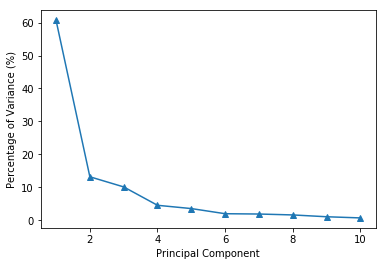

In [21]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(range(1, 11), pca.explained_variance_ratio_*100, marker='^')
plt.xlabel('Principal Component')
plt.ylabel('Percentage of Variance (%)')
plt.show()

In [22]:
pc = 0
total_var = 0
for i in pca.explained_variance_ratio_:
    pc += 1
    total_var += i*100
    print("Variance captured by PC " + str(pc) + ": " + str(total_var))

Variance captured by PC 1: 60.71423396853307
Variance captured by PC 2: 73.91121320168907
Variance captured by PC 3: 84.03498614256169
Variance captured by PC 4: 88.57852534332562
Variance captured by PC 5: 92.12588648109545
Variance captured by PC 6: 94.11392197960599
Variance captured by PC 7: 96.00589227704934
Variance captured by PC 8: 97.62130108194494
Variance captured by PC 9: 98.68690193362009
Variance captured by PC 10: 99.3982394514951


From the loop we created above we can see that the first seven components: PC 1, PC 2, PC 3 , PC 4, PC 5, PC 6 and PC 7 captures 96.005892277% of the variance in the data.

Using these 7 components as features to transform the data into a reduced dimension space.

In [24]:
pca = decomposition.PCA(n_components=7)
imgTrans = pca.fit(img_norm).transform(img_norm)
np.set_printoptions(precision=2,suppress=True)
print(imgTrans)

[[-0.69  0.53  0.25 ... -0.08  0.05 -0.05]
 [-0.67  0.51  0.34 ... -0.04  0.06 -0.04]
 [-0.71  0.77 -0.16 ... -0.17  0.04 -0.06]
 ...
 [-0.51 -0.13 -0.08 ... -0.03 -0.03 -0.11]
 [-0.48 -0.09 -0.16 ...  0.   -0.   -0.09]
 [-0.44 -0.11 -0.05 ...  0.02 -0.21  0.15]]


#### d. Perform Kmeans again, but this time on the lower dimensional transformed data. Then, compute the Completeness and Homogeneity values of the new clusters.

In [25]:
kmeans = KMeans(n_clusters=7) #Number of clusters = 7)

# Fitting the data
kmeans.fit(imgTrans)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=7, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [26]:
kmeans.labels_

array([3, 3, 3, ..., 5, 5, 4], dtype=int32)

In [27]:
kmeans.cluster_centers_

array([[ 0.18,  0.04, -0.26,  0.18,  0.03,  0.02,  0.  ],
       [ 1.41,  0.09,  0.04, -0.17, -0.03, -0.01, -0.02],
       [-0.6 , -0.36,  0.11, -0.13, -0.13, -0.02, -0.04],
       [-0.62,  0.64,  0.2 , -0.09, -0.07,  0.01,  0.04],
       [-0.21, -0.25,  0.15,  0.06,  0.13, -0.01,  0.03],
       [-0.51, -0.06, -0.34, -0.07,  0.08,  0.01, -0.03],
       [ 0.44, -0.1 ,  0.16,  0.23, -0.05, -0.01,  0.02]])

In [28]:
pd.DataFrame(kmeans.cluster_centers_.T, index=['PC 1','PC 2','PC 3','PC 4', 'PC 5', 'PC 6', 'PC 7'], columns=['Cluster 1', 'Cluster 2','Cluster 3','Cluster 4','Cluster 5',' Cluster 6','Cluster 7'])

,Cluster 1,Cluster 2,Cluster 3,Cluster 4,Cluster 5,Cluster 6,Cluster 7
PC 1,0.177392,1.414527,-0.603705,-0.619268,-0.206229,-0.510409,0.436890
PC 2,0.043820,0.087223,-0.355503,0.640250,-0.246205,-0.064687,-0.104936
PC 3,-0.264946,0.036765,0.109197,0.195829,0.152785,-0.336363,0.164951
PC 4,0.184546,-0.173195,-0.129799,-0.086856,0.056522,-0.065008,0.234379
PC 5,0.026771,-0.029922,-0.130911,-0.067760,0.130585,0.078962,-0.046159
PC 6,0.024409,-0.008973,-0.021603,0.008866,-0.005540,0.006227,-0.007512
PC 7,0.003417,-0.021573,-0.043882,0.038372,0.032849,-0.026326,0.015253


In [29]:
completeness = completeness_score(labels['Class Code'], kmeans.labels_)
homogeneity = homogeneity_score(labels['Class Code'], kmeans.labels_)

print('Completeness of Cluster: '+  str(completeness))
print('Homogeneity of Clusters: '+ str(homogeneity))

Completeness of Cluster: 0.6112983626480735
Homogeneity of Clusters: 0.6096453882709607


#### e. Discuss your observations based on the comparison of the two clustering results.

<b>When we do kMeans clustering on a normalized dataset the completeness and homogeneity we get is: Completeness of Cluster: 0.6126346286442206 Homogeneity of Clusters: 0.6109347107661535

<b>When we do kMeans clustering on a datatset with reduced uncorrelated features generated by PCA, which captures 95% of the variance in the data, the completeness and homogeneity we get is: Completeness of Cluster: 0.6112983626480735 Homogeneity of Clusters: 0.6096453882709607

<b>So the results are almost similar and there is no significant difference in completeness and homogeneity of clusters. Since the second approach, in which we reduce the number of features using PCA and still account for the most of the variance in the data, gives the same result as the earlier approach, I would suggest using PCA and then clustering as that would reduce the computation effort required by KMeans algorithm as the number of features are reduced from 19 to 7, and if the dataset is too large that would result into faster computations/results.